In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import  tree
from sklearn.metrics import classification_report
from IPython.display import display
%matplotlib inline

In [53]:
import csv
df1 = pd.read_csv(r"C:\Users\SATWIK M BADIGER\Desktop\AIML\Batting\t20bat.csv")
print(df1)

              Player         Team       Span  Mat Inns  NO Bat_Runs   HS  \
0            V Kohli        INDIA  2010-2019   75   70  20     2633  94*   
1          RG Sharma        INDIA  2007-2019  104   96  14     2633  118   
2         MJ Guptill  NEW ZEALAND  2009-2019   83   80   7     2436  105   
3       Shoaib Malik     PAKISTAN  2006-2019  111  104  30     2263   75   
4        BB McCullum  NEW ZEALAND  2005-2015   71   70  10     2140  123   
...              ...          ...        ...  ...  ...  ..      ...  ...   
2001  SG Whittingham     SCOTLAND  2018-2018    3    -   -        -    -   
2002     LJ Woodcock  NEW ZEALAND  2010-2011    3    -   -        -    -   
2003      Zamir Khan  AFGHANISTAN  2012-2012    1    -   -        -    -   
2004        S Zargar       MEXICO  2019-2019    1    -   -        -    -   
2005    Ziaur Rahman  AFGHANISTAN  2019-2019    1    -   -        -    -   

        Ave    BF      SR 100  50  0   4s   6s  
0     52.66  1907  138.07   0  24  2  

In [54]:
import csv
df2 = pd.read_csv(r"C:\Users\SATWIK M BADIGER\Desktop\AIML\Bowling\t20bowl.csv")
print(df2)

                 Player  Bowl_Inns  Overs  Mdns  Bowl_Runs   Wkts  Bowl_Ave  \
0            SL Malinga       79.0  284.5   1.0     2061.0  106.0     19.44   
1         Shahid Afridi       97.0  361.2   4.0     2396.0   98.0     24.44   
2       Shakib Al Hasan       75.0  277.5   2.0     1894.0   92.0     20.58   
3           Saeed Ajmal       63.0  238.2   2.0     1516.0   85.0     17.83   
4              Umar Gul       60.0  200.3   2.0     1443.0   85.0     16.97   
...                 ...        ...    ...   ...        ...    ...       ...   
2001       Ziaur Rehman        NaN    NaN   NaN        NaN    NaN       NaN   
2002        Zishan Shah        NaN    NaN   NaN        NaN    NaN       NaN   
2003   Zubaidi Zulkifle        NaN    NaN   NaN        NaN    NaN       NaN   
2004        B Zuiderent        NaN    NaN   NaN        NaN    NaN       NaN   
2005  Zulqarnain Haider        NaN    NaN   NaN        NaN    NaN       NaN   

      Econ  Bowl_SSR  
0     7.23      16.1  
1    

In [55]:
import csv
df3 = pd.read_csv(r"C:\Users\SATWIK M BADIGER\Desktop\AIML\Fielding\t20Field.csv")
print(df3)

               Player  St    D/I
0            MS Dhoni  34  0.938
1      AB de Villiers   7  0.923
2            D Ramdin  20  0.887
3        Kamran Akmal  32  1.034
4     Mushfiqur Rahim  28  0.719
...               ...  ..    ...
2001     Ziaur Rehman   0      0
2002    Zohaib Sarwar   0      0
2003        M Zondeki   0      0
2004          GMC Mol   0      -
2005    JD Schoonheim   0      -

[2006 rows x 3 columns]


In [56]:
df = pd.merge(df1, df2,on = "Player", how = "outer")
df = pd.merge(df , df3 , on = "Player" , how = "outer")
df.describe()
df.dropna()
df.fillna(0)
display(df)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,...,Bowl_Inns,Overs,Mdns,Bowl_Runs,Wkts,Bowl_Ave,Econ,Bowl_SSR,St,D/I
0,V Kohli,INDIA,2010-2019,75.0,70,20,2633,94*,52.66,1907,...,12.0,24.2,0.0,198.0,4.0,49.5,8.13,36.5,0.0,0.493
1,RG Sharma,INDIA,2007-2019,104.0,96,14,2633,118,32.1,1905,...,9.0,11.2,0.0,113.0,1.0,113.0,9.97,68.0,0.0,0.365
2,MJ Guptill,NEW ZEALAND,2009-2019,83.0,80,7,2436,105,33.36,1810,...,1.0,1.0,0.0,11.0,0.0,NaN,11.00,NaN,0.0,0.56
3,Shoaib Malik,PAKISTAN,2006-2019,111.0,104,30,2263,75,30.58,1824,...,46.0,90.0,0.0,644.0,28.0,23.0,7.15,19.2,0.0,0.45
4,BB McCullum,NEW ZEALAND,2005-2015,71.0,70,10,2140,123,35.66,1571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,RazaurRehman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,9.0,0.0,58.0,2.0,29.0,6.44,27.0,NaN,NaN
2100,ImamulHaq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,InzamamulHaq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,MisbahulHaq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df['Type'] = ''
df['Points'] = ''
df4 = pd.read_csv('C:\\Users\\SATWIK M BADIGER\\Desktop\\final.csv')
df = df4
df = df.fillna(0)
display(df)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,...,Mdns,Bowl_Runs,Wkts,Bowl_Ave,Econ,Bowl_SSR,St,D/I,Type,Points
0,V Kohli,INDIA,2010-2019,75,70,20,2633,94*,52.66,1907,...,0,198,4,49.5,8.13,36.5,0,0.493,0.0,0.0
1,RG Sharma,INDIA,2007-2019,104,96,14,2633,118,32.10,1905,...,0,113,1,113.0,9.97,68.0,0,0.365,0.0,0.0
2,MJ Guptill,NEW ZEALAND,2009-2019,83,80,7,2436,105,33.36,1810,...,0,11,0,0.0,11.00,0.0,0,0.560,0.0,0.0
3,Shoaib Malik,PAKISTAN,2006-2019,111,104,30,2263,75,30.58,1824,...,0,644,28,23.0,7.15,19.2,0,0.450,0.0,0.0
4,BB McCullum,NEW ZEALAND,2005-2015,71,70,10,2140,123,35.66,1571,...,0,0,0,0.0,0.00,0.0,8,0.619,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,RazaurRehman,0,0,0,0,0,0,0,0.00,0,...,0,58,2,29.0,6.44,27.0,0,0.000,0.0,0.0
2100,ImamulHaq,0,0,0,0,0,0,0,0.00,0,...,0,0,0,0.0,0.00,0.0,0,0.000,0.0,0.0
2101,InzamamulHaq,0,0,0,0,0,0,0,0.00,0,...,0,0,0,0.0,0.00,0.0,0,0.000,0.0,0.0
2102,MisbahulHaq,0,0,0,0,0,0,0,0.00,0,...,0,0,0,0.0,0.00,0.0,0,0.000,0.0,0.0


In [58]:
#df['Bat_Runs'].astype(int)
#df['St'].astype(int)
#df['St'].fillna(0)
#df.loc[(df['St']>0),'Type'] = "WK"
#df.loc[(df['Type'] != 'WK') & (df['Bat_Runs']>10) &(df['Wkts']<10), 'Type'] = "BAT"
#df.loc[(df['Type'] != 'WK') & (df['Wkts']>10) & (df['Type'] != 'BAT') & df['Wkts'] == '', 'Type'] = "BOWL"
#df.loc[(df['Type'] != 'WK') & (df['Bat_Runs']>500) & (df['Wkts']>50), 'Type'] = "AR"
#display(df)#

In [59]:
df = df.drop_duplicates(subset=['Player'], keep='first')
df = df.dropna()
df = df.sort_values(by='Player', ascending=True)
#print(df.to_string())

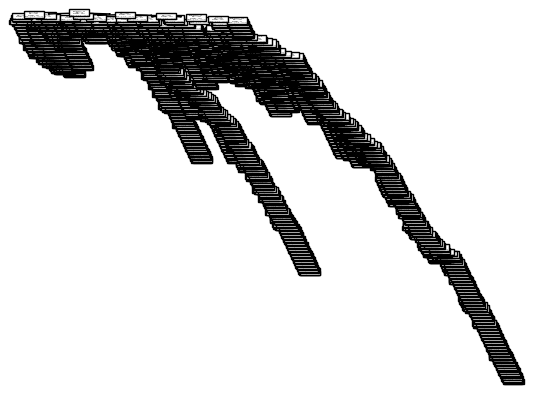

In [73]:
#df['Team'] = df['Team'].astype(float)
features =['Bat_Runs','Bowl_Runs','Wkts','Econ','Ave','Bowl_Ave','Bowl_SSR','St','D/I']
X = df[features]
y = df['Player']
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)
plt.savefig("mygraph.png")
sys.stdout.flush()